In [15]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons
import tensorflow as tf

In [44]:
moons = make_moons()

train, labels = moons[0], moons[1].reshape((-1, 1))
m, n = train.shape
train_std = (train - np.mean(train, axis=0))/np.std(train, axis=0)
norm_bias = np.c_[np.ones((m, 1)), train]

x_train = norm_bias[:80]
y_train = labels[:80]

x_test = norm_bias[80:]
y_test = labels[80:]

n_epoch = 1000
learning_rate = 0.01

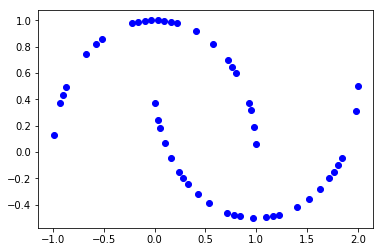

In [45]:
plt.plot(train[:50, 0], train[:50, 1], 'bo')

In [46]:
def random_batch(X_train, y_train, batch_size):
    rnd_idx = np.random.randint(0, len(X_train), batch_size)
    X_batch, y_batch = X_train[rnd_idx], y_train[rnd_idx]
    return X_batch, y_batch

In [47]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

In [49]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n+1])
y = tf.placeholder(tf.float32, [None, 1])
theta = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0), name='theta')
prob = tf.sigmoid(tf.matmul(X, theta))
pred = tf.round(prob)

epsilon = 1e-7  # to avoid an overflow when computing the log
logloss = 1/50 * (-tf.matmul(tf.transpose(y), tf.log(prob + epsilon)) - tf.matmul(tf.transpose(1-y), tf.log(1 - prob + epsilon)))
gradient = 1/50 * tf.matmul(tf.transpose(X), prob-y)
training_op = tf.assign(theta, theta-learning_rate * gradient)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epoch):
        rand_x, rand_y = random_batch(x_train, y_train, 50)
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tLogLoss = ", sess.run(logloss, feed_dict={X: rand_x, y: rand_y}))
        sess.run(training_op, feed_dict={X: rand_x, y: rand_y})
        
        
        final_theta = theta.eval()

Epoch: 0 	LogLoss =  [[0.89684784]]
Epoch: 100 	LogLoss =  [[0.70801365]]
Epoch: 200 	LogLoss =  [[0.60201657]]
Epoch: 300 	LogLoss =  [[0.65560675]]
Epoch: 400 	LogLoss =  [[0.46966568]]
Epoch: 500 	LogLoss =  [[0.54026985]]
Epoch: 600 	LogLoss =  [[0.43988958]]
Epoch: 700 	LogLoss =  [[0.46177828]]
Epoch: 800 	LogLoss =  [[0.41467696]]
Epoch: 900 	LogLoss =  [[0.3740675]]


In [ ]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n+1])
y = tf.placeholder(tf.float32, [None, 1])
theta = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0), name='theta')
prob = tf.sigmoid(-tf.matmul(X, theta))
pred = tf.round(prob)

logloss = -tf.reduce_mean(pred * tf.log(prob) + (1-pred) * tf.log(1-prob))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(logloss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epoch):
        rand_x, rand_y = random_batch(x_train, y_train, 50)
        if epoch % 100 == 0:
            print("Epoch:", epoch, "LogLoss = ", sess.run(logloss, feed_dict={X: rand_x, y: rand_y}))
        sess.run(training_op, feed_dict={X: rand_x, y: rand_y})
        
        final_theta = theta.eval()

In [ ]:
final_theta

In [ ]:
probs = sigmoid(np.matmul(norm_bias, final_theta))

In [ ]:
def predict_class(probs, cutoff):
    return np.array([1 if i > cutoff else 0 for i in probs])

In [ ]:
probs

In [ ]:
preds = predict_class(probs, 0.5)

In [ ]:
preds

In [ ]:
np.sum([1 for i in preds.reshape((-1, 1)) - labels if i != 0])/preds.shape[0]

# Sklearn Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
clf = LogisticRegression().fit(norm_bias[:50, :], labels[:50].reshape(-1, ))

In [ ]:
sk_preds = clf.predict(norm_bias[50:, :]).reshape((-1, 1))

In [ ]:
np.sum(sk_preds - labels[50:])/sk_preds.shape[0]